In [ ]:
#abrindo a sessao manualmente para funcinar no vcscod
from kedro.framework.session import KedroSession
session = KedroSession.create(project_path="../")
context = session.load_context()
catalog = context.catalog

In [76]:
data_filtered = catalog.load("train_set")
session_id = catalog.load('params:session_id')

[04/02/25 17:05:23] INFO     Loading data from train_set (ParquetDataset)...                    ]8;id=343594;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=536979;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py#401\401]8;;\

                    INFO     Loading data from params:session_id (MemoryDataset)...             ]8;id=76145;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=877600;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py#401\401]8;;\

In [77]:
from pycaret.classification import *

In [78]:
exp = ClassificationExperiment()
#exp.setup(data=train, target='Survived', session_id=session_id, log_experiment='mlflow', experiment_name='titanic_pycaret')
exp.setup(data=data_filtered, target='shot_made_flag', session_id=session_id)

,Description,Value
0,Session id,12345
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(16228, 7)"
4,Transformed data shape,"(16228, 7)"
5,Transformed train set shape,"(11359, 7)"
6,Transformed test set shape,"(4869, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [79]:
exp.get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x0000020BC7A4C7C0>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, response_method=('d...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, response_method='pre...",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, response_method='...",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, response_method='predict...",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x0000020BC7A4C...,"make_scorer(cohen_kappa_score, response_method...",pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x0000020BC7A4C...,"make_scorer(matthews_corrcoef, response_method...",pred,{},True,True,False


In [80]:
#criando uma seleçao de models
#include = ["lr", "ridge", "lda", "qda", "nb", "rf", "et", "knn", "dt", "svm", "dummy"]
include = ["lr","nb", "rf", "et", "knn", "dt", "svm", "dummy"]

#include = ["lr", "knn", "dt", "svm", "dummy"]

best = exp.compare_models(include=include, sort="AUC")
#best = exp.compare_models(sort="AUC")

<IPython.core.display.HTML object>

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5720,0.5920,0.4749,0.5624,0.5148,0.1367,0.1384,0.9540
nb,Naive Bayes,0.5714,0.5902,0.4960,0.5585,0.5253,0.1371,0.1379,0.0310
svm,SVM - Linear Kernel,0.5207,0.5891,0.3968,0.3275,0.3129,0.0311,0.0443,0.0650
rf,Random Forest Classifier,0.5612,0.5702,0.5331,0.5418,0.5373,0.1202,0.1202,0.3570
et,Extra Trees Classifier,0.5626,0.5620,0.5518,0.5419,0.5467,0.1243,0.1243,0.3020
knn,K Neighbors Classifier,0.5365,0.5401,0.5010,0.5158,0.5080,0.0701,0.0702,0.0610
dt,Decision Tree Classifier,0.5397,0.5224,0.5811,0.5164,0.5468,0.0824,0.0830,0.0390
dummy,Dummy Classifier,0.5219,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0180


<IPython.core.display.HTML object>

In [81]:
exp.pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5720,0.5920,0.4749,0.5624,0.5148,0.1367,0.1384,0.954
nb,Naive Bayes,0.5714,0.5902,0.4960,0.5585,0.5253,0.1371,0.1379,0.031
svm,SVM - Linear Kernel,0.5207,0.5891,0.3968,0.3275,0.3129,0.0311,0.0443,0.065
rf,Random Forest Classifier,0.5612,0.5702,0.5331,0.5418,0.5373,0.1202,0.1202,0.357
et,Extra Trees Classifier,0.5626,0.5620,0.5518,0.5419,0.5467,0.1243,0.1243,0.302
knn,K Neighbors Classifier,0.5365,0.5401,0.5010,0.5158,0.5080,0.0701,0.0702,0.061
dt,Decision Tree Classifier,0.5397,0.5224,0.5811,0.5164,0.5468,0.0824,0.0830,0.039
dummy,Dummy Classifier,0.5219,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.018


In [82]:
#best = _
exp.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [85]:
#tuned_model = exp.tune_model(best, n_iter=1000, optimize='F1')
tuned_model = exp.tune_model(best, n_iter=10, optimize='AUC')

#0.5276	0.5361	0.7244	0.5038	0.5941	0.0709	0.0776

<IPython.core.display.HTML object>

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5669,0.5787,0.4715,0.5553,0.5100,0.1266,0.1279
1,0.5739,0.5775,0.5009,0.5608,0.5292,0.1424,0.1431
2,0.5528,0.5830,0.4751,0.5364,0.5039,0.0996,0.1002
3,0.5960,0.6117,0.4936,0.5929,0.5387,0.1846,0.1870
4,0.6012,0.6287,0.4880,0.6023,0.5392,0.1945,0.1978
5,0.5572,0.5987,0.4549,0.5441,0.4955,0.1065,0.1079
6,0.5660,0.5819,0.4696,0.5543,0.5085,0.1247,0.1261
7,0.5563,0.5808,0.4530,0.5430,0.4940,0.1047,0.1061
8,0.5783,0.5909,0.4577,0.5751,0.5097,0.1481,0.1511


<IPython.core.display.HTML object>

Fitting 10 folds for each of 10 candidates, totalling 100 fits


<IPython.core.display.HTML object>

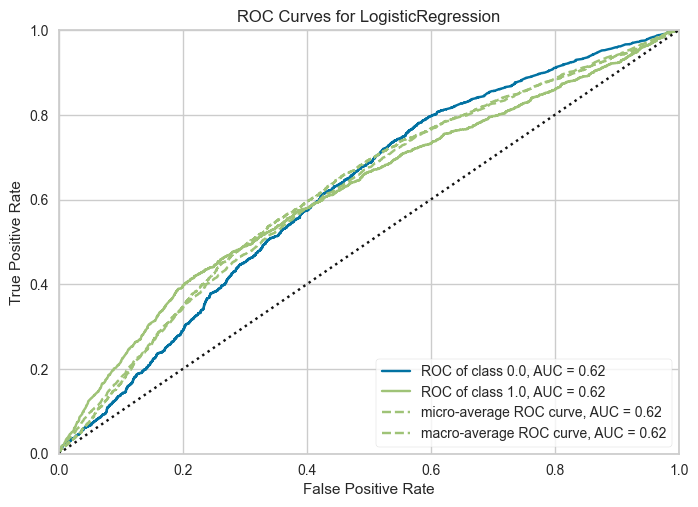

In [86]:
# Mostrar o gráfico
exp.plot_model(tuned_model, plot='auc')
